In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score as r2
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

In [2]:
import scikeras

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
import pandas as pd
df = pd.read_csv('../Data/address_data_combined.csv')

# Do Grid Search on K-folds

In [10]:
df.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
0,0x87d884aaa6ff9e9b6014631b0abae80b53953fb8,1,5151.68,15159.08,71235.62,1,0.010000,0.020000,0.013367,0.000000,0.000000,8,0.040100,0.040100
1,0xd42393df90d582bd8a5493171f0173e3a017d391,1,1179.02,1124.89,25126.45,13,0.000000,0.750000,0.176667,0.145000,0.419270,22,2.650000,-0.284889
2,0x3025c36d8a9620d3df89e9e9b1acbdfd639a6f37,1,361.73,0.00,723.47,1,4.999916,4.999916,4.999916,2.490000,2.499538,3,4.999916,0.000840
3,0x6309f709faad518fc158af4c14edfa7b06424770,1,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
4,0x3d020954e30c3d40b7f0c533cf198bc10dd45a49,1,14280.60,1479.86,45357.57,21,0.035000,0.200000,0.099286,2.084658,2.084658,22,2.085000,0.000342


In [11]:
X = df.drop(columns=['Address', 'FLAG'])
y = df['FLAG']

In [12]:
X.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
0,5151.68,15159.08,71235.62,1,0.010000,0.020000,0.013367,0.000000,0.000000,8,0.040100,0.040100
1,1179.02,1124.89,25126.45,13,0.000000,0.750000,0.176667,0.145000,0.419270,22,2.650000,-0.284889
2,361.73,0.00,723.47,1,4.999916,4.999916,4.999916,2.490000,2.499538,3,4.999916,0.000840
3,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
4,14280.60,1479.86,45357.57,21,0.035000,0.200000,0.099286,2.084658,2.084658,22,2.085000,0.000342


train-test split -- split 30% for test data and the remaining 70% for a kfolds cross validation

In [16]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train_full.shape)
X_train_full.head()

(9908, 12)


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
6709,17.06,0.00,51.17,1,101.0000,101.000000,101.000000,10.804780,33.666149,4,101.000000,0.001554
13808,2679.43,2841.02,275214.32,21,0.0001,15.000000,2.295850,0.000000,1.877316,100,103.313259,0.060902
8333,103299.49,37551.75,826452.87,6,0.0000,52.532971,23.290155,0.000000,16.627500,15,163.031084,30.011085
6981,4756.98,11283.84,46352.60,1,11.0000,20.000000,15.500000,9.975152,10.194942,7,31.000000,-19.974711
676,0.00,0.00,0.00,0,0.0000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000


Feature Engineering

In [17]:
# Feature Engineering
from sklearn.preprocessing import MinMaxScaler

columns = ['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)',
       'Unique Received From Addresses', 'min value received',
       'max value received ', 'avg val received', 'min val sent',
       'avg val sent', 'total transactions (including tnx to create contract',
       'total ether received', 'total ether balance']
    
scaler = MinMaxScaler()

# Log for Skewed Data
# log on both train and test data
for c in columns:
  X_train_full[c] = X_train_full[c].apply(lambda x: np.log(x) if x > 0 else 0)
  X_test[c] = X_test[c].apply(lambda x: np.log(x) if x > 0 else 0)

# Scaling
# only use training data to fit, to avoid data leakage
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

np.isnan(X_train_full)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

make scorer

In [19]:
from keras.metrics import Recall, RecallAtPrecision
# metrics to evaluate is the highest recall we can get for a precision above 0.75
RecallAtPrecision_scorer = RecallAtPrecision(precision=0.75)

define function that returns a compiled MLP. no training yet. the arguments can be tweaked to include the parameters you want to search over.

In [20]:
from tensorflow.keras.constraints import MaxNorm

def compile_mlp(input_dim, H, num_epochs, num_layers, activation, dropout_probability):

  # Creating Sequential MLP
  model_n = Sequential()

  model_n.add(layers.Dense(H, input_shape=(input_dim, ), activation= activation))

  for _ in range(num_layers - 1):
      model_n.add(layers.Dense(H, activation= activation, kernel_constraint=MaxNorm(3)))
      model_n.add(layers.Dropout(dropout_probability))

  model_n.add(layers.Dense(1, activation='sigmoid'))

  # configure the model
  # use F1 score beause it balances between preciison and recall
  model_n.compile(loss='binary_crossentropy', optimizer='adam', metrics=[RecallAtPrecision_scorer])
  # model_n.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Recall])
  return model_n

set initial parameters and compile the model

In [ ]:
from scikeras.wrappers import KerasClassifier
# def compile_mlp(input_dim, H, num_epochs, num_layers, activation_function):
# number of hidden nodes
H = 10
# num of epochs
num_epochs = 50
# num_layers
num_layers = 3
# activation function
activation_function = 'relu'
#dropout probability
dropout_probability = 0.2
# input dim
input_dim = X_train_full.shape[1]

model = KerasClassifier(model=compile_mlp, input_dim=input_dim, H=H, num_epochs=num_epochs, num_layers=num_layers, activation=activation_function, dropout_probability=dropout_probability)

set search space

In [ ]:
param_grid = {'activation':('relu', 'tanh', 'sigmoid'), 
              'H': [40, 50, 60, 70, 80],
              'num_epochs': [75, 100],
              'num_layers': [7, 8, 9, 10, 11, 12],
              'dropout_probability': [0.2, 0.3]}
# param_grid = {'H': [5, 10],
#               'num_layers': [3, 4, 5]}

# param_grid = dict(H=[5,10], num_layers=[3,4])
seed = 42
tf.random.set_seed(42)

do grid search

In [ ]:
grid = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=2, scoring= 'f1')

In [ ]:
grid.fit(X_train_full, y_train_full)

Streaming output truncated to the last 5000 lines.
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_epochs=75, num_layers=9; total time=   2.9s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_epochs=75, num_layers=10; total time=   3.8s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_epochs=75, num_layers=10; total time=   3.3s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_epochs=75, num_layers=10; total time=   3.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_epochs=75, num_layers=10; total time=   3.1s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_epochs=75, num_layers=10; total time=   3

GridSearchCV(cv=5,
             estimator=KerasClassifier(H=10, activation='relu', dropout_probability=0.2, input_dim=12, model=<function compile_mlp at 0x7fd7d778de60>, num_epochs=50, num_layers=3),
             param_grid={'H': [40, 50, 60, 70, 80],
                         'activation': ('relu', 'tanh', 'sigmoid'),
                         'dropout_probability': [0.2, 0.3],
                         'num_epochs': [75, 100],
                         'num_layers': [7, 8, 9, 10, 11, 12]},
             scoring='f1', verbose=2)

In [ ]:
grid.best_params_

{'H': 60,
 'activation': 'relu',
 'dropout_probability': 0.2,
 'num_epochs': 75,
 'num_layers': 10}

In [ ]:
grid.best_score_

0.8598840668211614

In [ ]:
best_mlp = grid.best_estimator_
best_mlp

KerasClassifier(
	model=<function compile_mlp at 0x7fd7d778de60>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	input_dim=12
	H=60
	num_epochs=75
	num_layers=10
	activation=relu
	dropout_probability=0.2
	class_weight=None
)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_H,param_activation,param_dropout_probability,param_num_epochs,param_num_layers,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.269723,1.763868,0.256154,0.003644,40,relu,0.2,75,7,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.840157,0.849462,0.837480,0.843267,0.869372,0.847948,0.011432,19
1,2.508060,0.226203,0.304012,0.092718,40,relu,0.2,75,8,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.827473,0.828723,0.834793,0.816754,0.828905,0.827329,0.005865,88
2,3.090054,0.298628,0.267561,0.018038,40,relu,0.2,75,9,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.807093,0.824859,0.802974,0.829837,0.828893,0.818731,0.011383,114
3,2.856402,0.164006,0.272061,0.020201,40,relu,0.2,75,10,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.788797,0.837185,0.843886,0.827111,0.822329,0.823862,0.019084,93
4,2.992531,0.161860,0.272565,0.022007,40,relu,0.2,75,11,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.840373,0.784119,0.813046,0.831237,0.850178,0.823791,0.023307,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,3.978984,0.346362,0.348326,0.074033,80,sigmoid,0.3,100,8,"{'H': 80, 'activation': 'sigmoid', 'dropout_pr...",0.630270,0.000000,0.000000,0.000000,0.000000,0.126054,0.252108,255
356,4.189176,0.017048,0.493316,0.243556,80,sigmoid,0.3,100,9,"{'H': 80, 'activation': 'sigmoid', 'dropout_pr...",0.630270,0.000000,0.630743,0.000000,0.000000,0.252202,0.308884,242
357,4.289061,0.492117,0.476351,0.055950,80,sigmoid,0.3,100,10,"{'H': 80, 'activation': 'sigmoid', 'dropout_pr...",0.630270,0.000000,0.630743,0.000000,0.000000,0.252202,0.308884,242
358,4.458329,0.575885,0.453220,0.064476,80,sigmoid,0.3,100,11,"{'H': 80, 'activation': 'sigmoid', 'dropout_pr...",0.630270,0.000000,0.000000,0.000000,0.000000,0.126054,0.252108,255


In [ ]:
results.to_csv('mlp-grid.csv')

In [ ]:
best_mlp.score(X_test, y_test)

133/133 [==============================] - 0s 2ms/step


0.8669649164115847

In [21]:
model_tuned = compile_mlp(X_train_full.shape[1], 60, 75, 10, 'relu', 0.2)
model_tuned.fit(X_train_full, y_train_full)

310/310 [==============================] - 3s 4ms/step - loss: 0.4807 - recall_at_precision_1: 0.7179


In [22]:
from sklearn.metrics import accuracy_score
predicted_y = model_tuned.predict(X_test)
predicted_y = (predicted_y > 0.5).astype('int32')
accuracy_score(predicted_y, y_test)

133/133 [==============================] - 0s 2ms/step


0.8224629149988227

In [26]:
import shap
shap.initjs()

In [31]:
explainer = shap.Explainer(model_tuned, X_train_full, feature_names=X.columns)
shap_values500 = explainer(X_train_full[:500])

Permutation explainer: 501it [03:58,  2.02it/s]


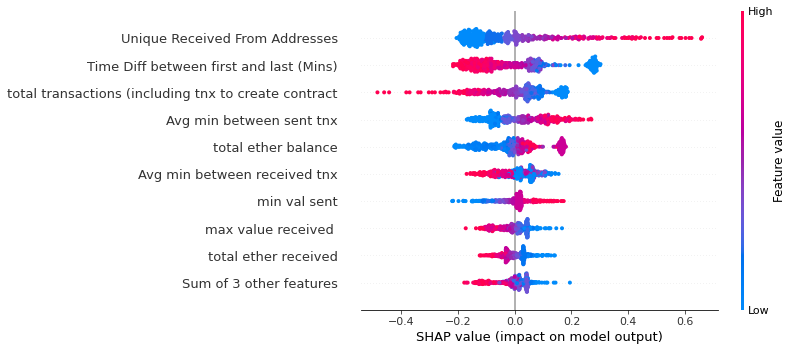

In [32]:
f = shap.plots.beeswarm(shap_values,show=False)

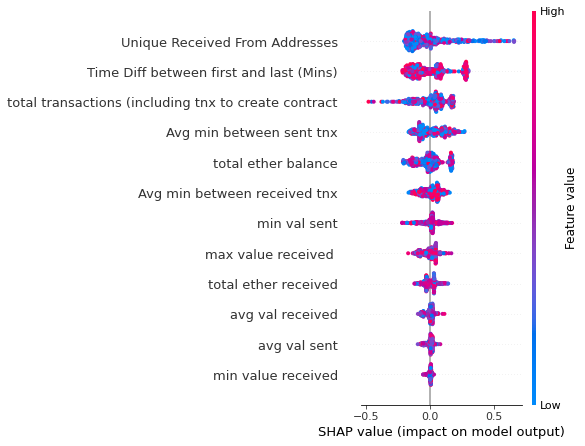

In [36]:
shap.summary_plot(shap_values,X_test[:500],feature_names=X.columns)

Permutation explainer: 4248it [30:56,  2.28it/s]


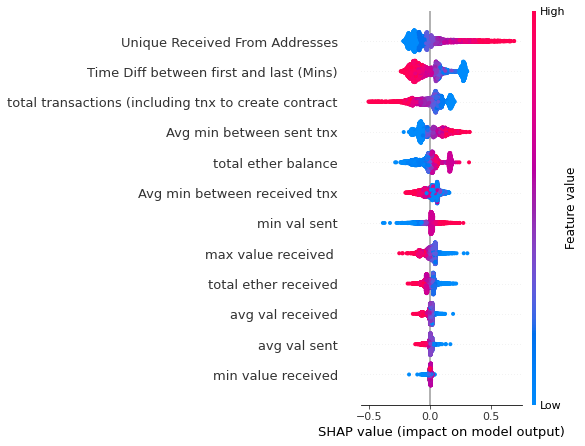

In [38]:
shap_values_test_full = explainer(X_test)
shap.summary_plot(shap_values_test_full,X_test,feature_names=X.columns)